In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
## Ignoring warnings 
warnings.filterwarnings('ignore')

import pandas 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

## Loading Data Set

In [3]:
%ls 

2010SantaBarbaraCA.csv                  gapminderDataFiveYear.csv
2010SitkaAK.csv                         mpg.csv
2010YumaAZ.csv                          nst-est2017-alldata.csv
2018WinterOlympics.csv                  rent_591_sample.csv
BoEBaseRate.csv*                        rent_591_sample2.csv
KaggleTutorial20181022.ipynb            submission.csv
NumberOfMPsExpenseClaims_2010-2015.csv* submission2.csv
TotalCo2EmissionsByCountry.csv*         test.csv
Untitled.ipynb                          train.csv
Untitled1.ipynb                         trump.txt
arrhythmia.csv                          wheels.csv
data_description.txt


In [4]:
import pandas
trainData = pandas.read_csv('train.csv')
testData = pandas.read_csv('test.csv')

In [5]:
trainData.shape

(1460, 81)

In [7]:
testData.shape

(1459, 80)

## Feature Engineering

In [8]:
import pandas

trainData['dataType'] ='train'
testData['dataType']  ='test'
SalePrice = trainData['SalePrice']
fullData  = pandas.concat((trainData, testData)).reset_index(drop=True)
fullData.drop(['SalePrice'], axis=1, inplace=True)

### Cleaning Data and Imputing Missing values

In [9]:
nullcount = fullData.isnull().sum().sort_values(ascending=False)
percent = (fullData.isnull().sum()/fullData.isnull().count()).sort_values(ascending=False)

In [10]:
fullData['Electrical'].value_counts()
fullData['Electrical'].fillna("SBrkr", inplace=True)
fullData['Electrical'].isnull().sum()

0

In [11]:
fullData['KitchenQual'].fillna("TA", inplace=True)
fullData['KitchenQual'].isnull().sum()

0

In [12]:
fullData['Exterior1st'].fillna("VinylSd", inplace=True)
fullData['Exterior2nd'].fillna("VinylSd", inplace=True)

In [13]:
fullData['MasVnrType'].fillna("None", inplace=True)
fullData['MasVnrType'].isnull().sum()

0

In [14]:
fullData['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [15]:
fullData['MasVnrArea'].fillna(0.0, inplace=True)
fullData['MasVnrArea'].isnull().sum()

0

In [16]:
fullData['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [17]:
for col in ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtFullBath','BsmtHalfBath']:
    print(fullData[col].value_counts())

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64
0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64


In [18]:
fullData['BsmtQual'].fillna("None", inplace=True)
fullData['BsmtCond'].fillna("None", inplace=True)
fullData['BsmtFinType1'].fillna("None", inplace=True)
fullData['BsmtFinType2'].fillna("None", inplace=True)
fullData['BsmtExposure'].fillna("No", inplace=True)

In [19]:
for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    print(fullData[col].describe())

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [20]:
for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    print(fullData[col].describe())

fullData['BsmtFinSF1'].fillna(0.0, inplace=True)
fullData['BsmtFinSF2'].fillna(0.0, inplace=True)
fullData['BsmtUnfSF'].fillna(467.0, inplace=True)
fullData['TotalBsmtSF'].fillna(0.0, inplace=True)

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [21]:
fullData['TotalBsmtSF'].fillna(0.0, inplace=True)

In [22]:
for e in ['GarageCond','GarageType','GarageFinish','GarageQual','GarageCars']:
    print(e)

GarageCond
GarageType
GarageFinish
GarageQual
GarageCars


In [23]:
fullData['GarageType'].fillna("None", inplace=True)
fullData['GarageFinish'].fillna("None", inplace=True)
fullData['GarageCond'].fillna("None", inplace=True)
fullData['GarageQual'].fillna("None", inplace=True)
fullData['GarageYrBlt'].fillna(0.0, inplace=True)


In [24]:
fullData['GarageCars'].fillna(0.0, inplace=True)
fullData['GarageArea'].fillna(0.0, inplace=True)

In [25]:
fullData['Functional'].isnull().sum()

fullData = fullData[fullData['Functional'].notnull()]

In [26]:
fullData['Utilities'].fillna('AllPub', inplace=True)

In [27]:
fullData['SaleType'].fillna('WD', inplace=True)

In [28]:
fullData['MSZoning'].fillna('RL', inplace=True)

In [29]:
fullData['LotFrontage'].describe()

count    2431.000000
mean       69.305224
std        23.352739
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def imputeMissing(df, idx, predictors):
    tempdf = df[df[outcome].isnull()].index
    tempndf = df[df[idx].notnull()].index
    model = RandomForestRegressor(n_estimators=100)
    model.fit(df.loc[tempndf, predictors], df.loc[tempndf, [outcome]])
    predict = model.predict(df.loc[tempndf, predictors])
    j=0;
    for i in tempdf:
        df.loc[i,outcome] = predict[j]
        j=j+1
    return(df)

In [31]:
predictors=['LotArea','Street','LotShape','LandContour','LotConfig']
outcome='LotFrontage'

var_mod = ['Street','LotShape','LandContour','LotConfig']
le = LabelEncoder()
for i in var_mod:
    fullData[i] = le.fit_transform(fullData[i].astype(str))

fullData = imputeMissing(fullData,outcome,predictors)
fullData['LotFrontage'].isnull().sum()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0

### Outliars/Noise filtering 

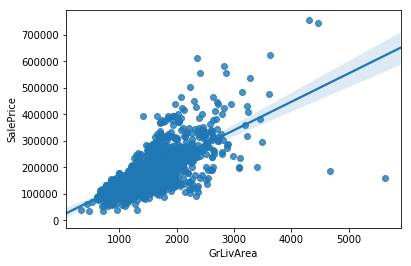

In [32]:
sns.regplot(x=trainData["GrLivArea"], y=trainData["SalePrice"])

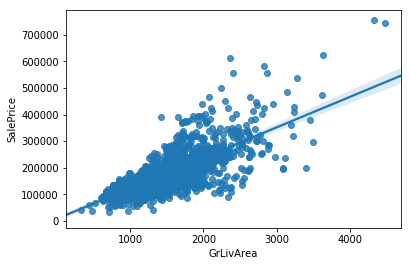

In [33]:
#sns.regplot(x=trainData["GrLivArea"], y=trainData["SalePrice"])
trainData = trainData.drop(trainData[(trainData['GrLivArea']>4000) & (trainData['SalePrice']<200000)].index)
sns.regplot(x=trainData["GrLivArea"], y=trainData["SalePrice"])

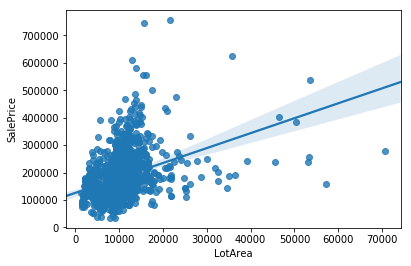

In [34]:
trainData = trainData.drop(trainData[(trainData['LotArea']>100000) & (trainData['SalePrice']<450000)].index)
sns.regplot(x=trainData["LotArea"], y=trainData["SalePrice"])

## 建構Linear Regression 模型

In [35]:

skipedCols = ['SalePrice', 'PoolQC','MiscFeature','Alley','Id','Fence','FireplaceQu','dataType']
predictors = [x for x in trainData.columns if x not in skipedCols]


le = LabelEncoder()
for i in predictors:
    trainData[i] = le.fit_transform(trainData[i].astype(str))
    
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model1, trainData[predictors], trainData['SalePrice'],cv=kfold)

print("CV Score")
print("Mean : {}".format(round(np.mean(results),4)))
print("Standard Deviation : {}".format(round(np.std(results),4)))
print("Min : {}".format(round(np.min(results),4)))
print("Max : {}".format(round(np.max(results),4)))

CV Score
Mean : 0.787
Standard Deviation : 0.0356
Min : 0.7067
Max : 0.8387


In [37]:
skipedCols = ['SalePrice', 'PoolQC','MiscFeature','Alley','Id','Fence','FireplaceQu','dataType']
predictors = [x for x in trainData.columns if x not in skipedCols]

for i in predictors:
    testData[i] = le.fit_transform(testData[i].astype(str))

In [41]:
clf = LinearRegression()
clf.fit(trainData[predictors],trainData['SalePrice'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
res = clf.predict(testData[predictors])

In [44]:
predictedDF = pandas.DataFrame({'Id': testData.Id, 'SalePrice': res})
predictedDF.to_csv('submission.csv', index=False)

## 建構 GradientBoosting 模型

In [45]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [46]:
skipedCols = ['SalePrice', 'PoolQC','MiscFeature','Alley','Id','Fence','FireplaceQu','dataType']
predictors = [x for x in trainData.columns if x not in skipedCols]


le = LabelEncoder()
for i in predictors:
    trainData[i] = le.fit_transform(trainData[i].astype(str))
    
seed = 7
model1 = GradientBoostingRegressor(random_state=10)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model1, trainData[predictors], trainData['SalePrice'],scoring='r2', cv=kfold)

### View the first model performance metrics
print("CV Score")
print("Mean : {}".format(round(np.mean(results),4)))
print("Standard Deviation : {}".format(round(np.std(results),4)))
print("Min : {}".format(round(np.min(results),4)))
print("Max : {}".format(round(np.max(results),4)))

CV Score
Mean : 0.8781
Standard Deviation : 0.0186
Min : 0.8442
Max : 0.9111


In [47]:
skipedCols = ['SalePrice', 'PoolQC','MiscFeature','Alley','Id','Fence','FireplaceQu','dataType']
predictors = [x for x in trainData.columns if x not in skipedCols]

for i in predictors:
    testData[i] = le.fit_transform(testData[i].astype(str))

In [48]:
clf = GradientBoostingRegressor(random_state=10,)
clf.fit(trainData[predictors],trainData['SalePrice'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=10,
             subsample=1.0, verbose=0, warm_start=False)

In [49]:
res = clf.predict(testData[predictors])

In [50]:
predictedDF = pandas.DataFrame({'Id': testData.Id, 'SalePrice': res})
predictedDF.to_csv('submission2.csv', index=False)

## Tuning Model

In [51]:
clf = GradientBoostingRegressor(random_state=10,learning_rate=0.1, min_samples_split=100,min_samples_leaf=5,max_depth=7,
                                                  max_features=28, n_estimators=160,subsample=0.8)
clf.fit(trainData[predictors],trainData['SalePrice'])


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=28,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=100, min_weight_fraction_leaf=0.0,
             n_estimators=160, presort='auto', random_state=10,
             subsample=0.8, verbose=0, warm_start=False)

In [52]:
res = clf.predict(testData[predictors])

In [53]:
predictedDF = pandas.DataFrame({'Id': testData.Id, 'SalePrice': res})
predictedDF.to_csv('submission3.csv', index=False)